In [42]:
import pandas as pd
import utils
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
sns.set_context('paper')

In [43]:
df = pd.read_csv('new_final.csv')
display(df)

benchmarks = df['benchmark'].unique()
print(benchmarks)
comparable = {
    # # # shared preferences login benchmarks
    # 'localLoginSharedPref-1000': ['localLoginEncSharedPref-1000'],
    # 'localLoginSharedPref-10000': ['localLoginEncSharedPref-10000'],
    # 'localLoginSharedPref-50000': ['localLoginEncSharedPref-50000'],

    # # # file login benchmarks
    # 'localLogin-100': ['localLoginEnc-100'],
    # 'localLogin-1000': ['localLoginEnc-1000'],
    # 'localLogin-5000': ['localLoginEnc-5000'],
    # 'localLogin-10000': ['localLoginEnc-10000'],

    # # file creation benchmarks
    'makeFile-10-10mb': ['makeEncFile-10-10mb'],
    'makeFile-30-10mb': ['makeEncFile-30-10mb'],
    'makeFile-50-10mb': ['makeEncFile-50-10mb'],
    
    'makeFile-10-20mb': ['makeEncFile-10-20mb'],
    'makeFile-30-20mb': ['makeEncFile-30-20mb'],
    'makeFile-50-20mb': ['makeEncFile-50-20mb'],
    
    'makeFile-10-30mb': ['makeEncFile-10-30mb'],
    'makeFile-30-30mb': ['makeEncFile-30-30mb'],
    'makeFile-50-30mb': ['makeEncFile-50-30mb']
}

DATA_COLUMN = 'energy_total'
p_threshold = 0.05

,benchmark,time,charge,mAh_total,mAh_cpu,mAh_wifi,energy_total,energy_cpu,energy_wifi
0,localLoginSharedPref-1000,225.0,1.743,0.342,0.341,0.00111,2.145982,2.139707,0.006965
1,localLoginSharedPref-1000,255.0,1.743,0.353,0.352,0.00111,2.215004,2.208730,0.006965
2,localLoginSharedPref-1000,258.0,1.743,0.356,0.355,0.00111,2.233829,2.227554,0.006965
3,localLoginSharedPref-1000,237.0,1.743,0.321,0.320,0.00111,2.014211,2.007936,0.006965
4,localLoginSharedPref-1000,250.0,1.743,0.331,0.330,0.00111,2.076959,2.070684,0.006965
...,...,...,...,...,...,...,...,...,...
771,makeFile-30-30mb,3026.0,2.406,0.777,0.776,0.00111,6.730063,6.721402,0.009614
772,makeFile-30-30mb,2928.0,2.406,0.697,0.695,0.00123,6.037135,6.019812,0.010654
773,makeFile-30-30mb,3266.0,2.406,0.750,0.749,0.00111,6.496200,6.487538,0.009614
774,makeFile-30-30mb,3406.0,2.406,0.748,0.747,0.00123,6.478877,6.470215,0.010654


['localLoginSharedPref-1000' 'localLoginEncSharedPref-10000'
 'localLoginEncSharedPref-50000' 'localLoginEncSharedPref-1000'
 'localLoginSharedPref-10000' 'localLoginSharedPref-50000'
 'localLoginEnc-10000' 'localLoginEnc-100' 'localLogin-100'
 'localLogin-5000' 'localLogin-10000' 'localLoginEnc-5000'
 'localLogin-1000' 'localLoginEnc-1000' 'makeEncFile-30-10mb'
 'makeFile-10-10mb' 'makeFile-30-10mb' 'makeFile-50-10mb'
 'makeEncFile-50-10mb' 'makeEncFile-10-10mb' 'makeFile-50-20mb'
 'makeEncFile-30-20mb' 'makeFile-30-20mb' 'makeFile-10-20mb'
 'makeEncFile-50-20mb' 'makeEncFile-10-20mb' 'makeEncFile-30-30mb'
 'makeEncFile-50-30mb' 'makeFile-10-30mb' 'makeEncFile-10-30mb'
 'makeFile-50-30mb' 'makeFile-30-30mb']


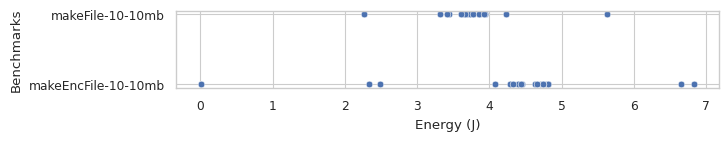

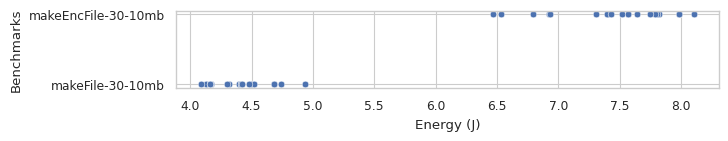

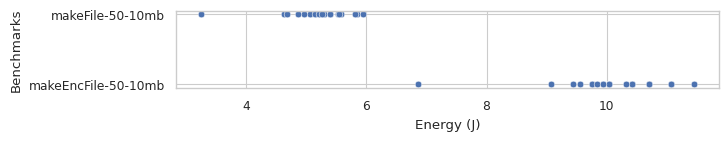

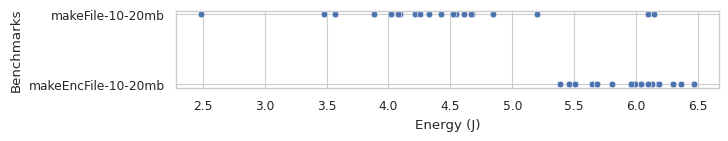

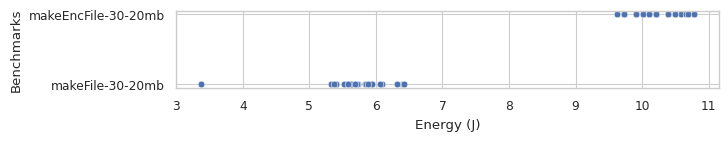

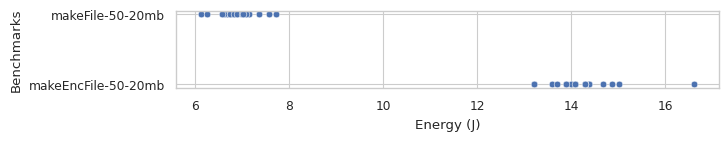

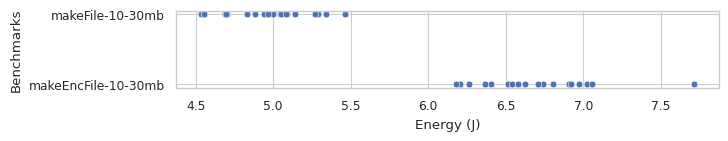

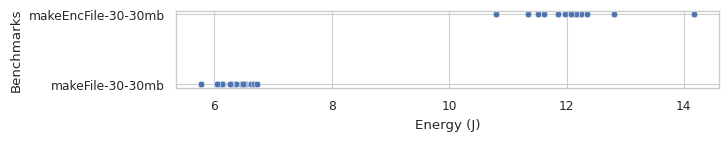

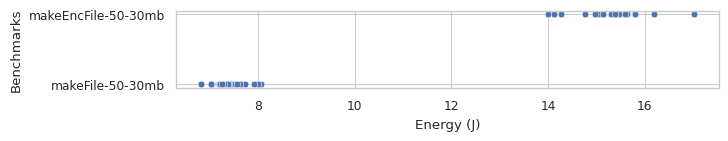

In [44]:
for key, values in comparable.items():
    data = df[df['benchmark'].isin([key, *values])]

    plt.figure(figsize=(7,1))
    ax = sns.scatterplot(data=data, x=DATA_COLUMN, y='benchmark')
    
    ax.set_ylabel("Benchmarks")
    ax.set_xlabel("Energy (J)")
    
    plt.show()

## Remove outliers
The outliers are removed using the `quantile` method

In [45]:
new_df = pd.DataFrame(columns=df.columns)

for benchmark in benchmarks:
    bench_df = df[df['benchmark'] == benchmark]
    bench_df = utils.remove_outliers(bench_df, DATA_COLUMN)
    new_df = pd.concat([new_df] + [bench_df], ignore_index=True)
    
display(df := new_df)

,benchmark,time,charge,mAh_total,mAh_cpu,mAh_wifi,energy_total,energy_cpu,energy_wifi
0,localLoginSharedPref-1000,225.0,1.743,0.342,0.341,0.00111,2.145982,2.139707,0.006965
1,localLoginSharedPref-1000,255.0,1.743,0.353,0.352,0.00111,2.215004,2.208730,0.006965
2,localLoginSharedPref-1000,258.0,1.743,0.356,0.355,0.00111,2.233829,2.227554,0.006965
3,localLoginSharedPref-1000,237.0,1.743,0.321,0.320,0.00111,2.014211,2.007936,0.006965
4,localLoginSharedPref-1000,250.0,1.743,0.331,0.330,0.00111,2.076959,2.070684,0.006965
...,...,...,...,...,...,...,...,...,...
717,makeFile-30-30mb,3026.0,2.406,0.777,0.776,0.00111,6.730063,6.721402,0.009614
718,makeFile-30-30mb,2928.0,2.406,0.697,0.695,0.00123,6.037135,6.019812,0.010654
719,makeFile-30-30mb,3266.0,2.406,0.750,0.749,0.00111,6.496200,6.487538,0.009614
720,makeFile-30-30mb,3406.0,2.406,0.748,0.747,0.00123,6.478877,6.470215,0.010654


## Normality Tests
Check if each benchmark's samples are normally distributed

In [46]:
from scipy.stats import shapiro
from scipy.stats import normaltest

stats_df = []

for benchmark in benchmarks:
    data = df[df['benchmark'] == benchmark][DATA_COLUMN].values

    if len(data) == 0: continue

    results = []

    # Shapiro-Wilks (>= 3 samples)
    _, p = shapiro(data)
    results.append(p >= p_threshold)

    # D'Agostino's K² Test (>= 8 samples)
    _, p = normaltest(data)
    results.append(p >= p_threshold)

    # Anderson-Darling Test
    p = utils.anderson(data)
    results.append(p >= p_threshold)

    is_normal = not False in results

    stats_df.append([benchmark, len(data), *results, is_normal])

stats_df = pd.DataFrame(stats_df, columns=['benchmark', 'num_samples', 'shapiro', 'agostino', 'anderson', 'normal'])
stats_df

/home/bernas/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/home/bernas/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/home/bernas/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/home/bernas/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/home/bernas/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest on

,benchmark,num_samples,shapiro,agostino,anderson,normal
0,localLoginSharedPref-1000,28,True,True,True,True
1,localLoginEncSharedPref-10000,25,True,True,True,True
2,localLoginEncSharedPref-50000,26,True,True,True,True
3,localLoginEncSharedPref-1000,28,True,True,True,True
4,localLoginSharedPref-10000,27,True,True,True,True
5,localLoginSharedPref-50000,30,False,True,False,False
6,localLoginEnc-10000,28,True,True,True,True
7,localLoginEnc-100,23,True,True,True,True
8,localLogin-100,27,True,True,True,True
9,localLogin-5000,24,True,True,True,True


## Homogeneity of Variance

In [47]:
from scipy.stats import levene

isNormal = lambda x: stats_df[stats_df['benchmark'] == x]['normal'].values[0]

stats_df['levene'] = [False] * len(stats_df)
for key, values in comparable.items():
    if not isNormal(key): continue

    baseline = df[df['benchmark'] == key][DATA_COLUMN]
    for benchmark in values:
        if not isNormal(benchmark): continue

        data = df[df['benchmark'] == benchmark][DATA_COLUMN]
        _, p = levene(baseline, data)

        i = stats_df.index[stats_df['benchmark'] == benchmark].values[0]
        stats_df.at[i, 'levene'] = p >= p_threshold

stats_df

,benchmark,num_samples,shapiro,agostino,anderson,normal,levene
0,localLoginSharedPref-1000,28,True,True,True,True,False
1,localLoginEncSharedPref-10000,25,True,True,True,True,False
2,localLoginEncSharedPref-50000,26,True,True,True,True,False
3,localLoginEncSharedPref-1000,28,True,True,True,True,False
4,localLoginSharedPref-10000,27,True,True,True,True,False
5,localLoginSharedPref-50000,30,False,True,False,False,False
6,localLoginEnc-10000,28,True,True,True,True,False
7,localLoginEnc-100,23,True,True,True,True,False
8,localLogin-100,27,True,True,True,True,False
9,localLogin-5000,24,True,True,True,True,False


## Are the differences due to chance?

### Analysis of Variance (ANOVA)

In [48]:
from scipy.stats import f_oneway

isHomogenous = lambda x: stats_df[stats_df['benchmark'] == x]['levene'].values[0]

stats_df['anova'] = [False] * len(stats_df)
for key, values in comparable.items():
    if not isNormal(key): continue

    baseline = df[df['benchmark'] == key][DATA_COLUMN]
    for benchmark in values:
        if not (isNormal(benchmark) and isHomogenous(benchmark)) : continue

        data = df[df['benchmark'] == benchmark][DATA_COLUMN]
        _, p = f_oneway(baseline, data)

        i = stats_df.index[stats_df['benchmark'] == benchmark].values[0]
        stats_df.at[i, 'anova'] = p < p_threshold

stats_df

,benchmark,num_samples,shapiro,agostino,anderson,normal,levene,anova
0,localLoginSharedPref-1000,28,True,True,True,True,False,False
1,localLoginEncSharedPref-10000,25,True,True,True,True,False,False
2,localLoginEncSharedPref-50000,26,True,True,True,True,False,False
3,localLoginEncSharedPref-1000,28,True,True,True,True,False,False
4,localLoginSharedPref-10000,27,True,True,True,True,False,False
5,localLoginSharedPref-50000,30,False,True,False,False,False,False
6,localLoginEnc-10000,28,True,True,True,True,False,False
7,localLoginEnc-100,23,True,True,True,True,False,False
8,localLogin-100,27,True,True,True,True,False,False
9,localLogin-5000,24,True,True,True,True,False,False


### Random Sampling

In [49]:
from multiprocessing import Pool

REPS = 500000

task = []
for key, values in comparable.items():
    if not (isNormal(key) and isHomogenous(key)):
        task = [*task, *[(key, value) for value in values]]
    for benchmark in values:
        if isNormal(benchmark) and isHomogenous(benchmark): continue
        task = [*task, (key, benchmark)]

def ab_test(sample):
    base, diff = sample

    baseline = df[df['benchmark'] == base]
    data = df[df['benchmark'] == diff]

    if len(data) < 1: return

    pvalue, _, _ = utils.random_sampling(baseline, data, DATA_COLUMN, REPS, log=False)

    return diff, pvalue

stats_df['random'] = [False] * len(stats_df)
with Pool() as pool:
    results = pool.map(ab_test, task)

    for benchmark, pvalue in results:
        i = stats_df.index[stats_df['benchmark'] == benchmark].values[0]
        stats_df.at[i, 'random'] = pvalue < p_threshold

stats_df

,benchmark,num_samples,shapiro,agostino,anderson,normal,levene,anova,random
0,localLoginSharedPref-1000,28,True,True,True,True,False,False,False
1,localLoginEncSharedPref-10000,25,True,True,True,True,False,False,False
2,localLoginEncSharedPref-50000,26,True,True,True,True,False,False,False
3,localLoginEncSharedPref-1000,28,True,True,True,True,False,False,False
4,localLoginSharedPref-10000,27,True,True,True,True,False,False,False
5,localLoginSharedPref-50000,30,False,True,False,False,False,False,False
6,localLoginEnc-10000,28,True,True,True,True,False,False,False
7,localLoginEnc-100,23,True,True,True,True,False,False,False
8,localLogin-100,27,True,True,True,True,False,False,False
9,localLogin-5000,24,True,True,True,True,False,False,False


In [50]:
stats_df['significant'] = [False] * len(stats_df)

for i, row in stats_df.iterrows():
    stats_df.at[i, 'significant'] = row['anova'] or row['random']

stats_df

,benchmark,num_samples,shapiro,agostino,anderson,normal,levene,anova,random,significant
0,localLoginSharedPref-1000,28,True,True,True,True,False,False,False,False
1,localLoginEncSharedPref-10000,25,True,True,True,True,False,False,False,False
2,localLoginEncSharedPref-50000,26,True,True,True,True,False,False,False,False
3,localLoginEncSharedPref-1000,28,True,True,True,True,False,False,False,False
4,localLoginSharedPref-10000,27,True,True,True,True,False,False,False,False
5,localLoginSharedPref-50000,30,False,True,False,False,False,False,False,False
6,localLoginEnc-10000,28,True,True,True,True,False,False,False,False
7,localLoginEnc-100,23,True,True,True,True,False,False,False,False
8,localLogin-100,27,True,True,True,True,False,False,False,False
9,localLogin-5000,24,True,True,True,True,False,False,False,False


## Average Percentage Difference

In [51]:
stats_df['mean'] = 0.0 * len(stats_df)
stats_df['diff'] = 0.0 * len(stats_df)

for key, values in comparable.items():
    baseline = df[df['benchmark'] == key][DATA_COLUMN].mean()

    i = stats_df.index[stats_df['benchmark'] == key].values[0]
    stats_df.at[i, 'mean'] = baseline

    for benchmark in values:
        data = df[df['benchmark'] == benchmark][DATA_COLUMN].mean()
        
        i = stats_df.index[stats_df['benchmark'] == benchmark].values[0]
        stats_df.at[i, 'mean'] = data
        stats_df.at[i, 'diff'] = (data - baseline) * 100/ baseline

stats_df

,benchmark,num_samples,shapiro,agostino,anderson,normal,levene,anova,random,significant,mean,diff
0,localLoginSharedPref-1000,28,True,True,True,True,False,False,False,False,0.000000,0.000000
1,localLoginEncSharedPref-10000,25,True,True,True,True,False,False,False,False,0.000000,0.000000
2,localLoginEncSharedPref-50000,26,True,True,True,True,False,False,False,False,0.000000,0.000000
3,localLoginEncSharedPref-1000,28,True,True,True,True,False,False,False,False,0.000000,0.000000
4,localLoginSharedPref-10000,27,True,True,True,True,False,False,False,False,0.000000,0.000000
5,localLoginSharedPref-50000,30,False,True,False,False,False,False,False,False,0.000000,0.000000
6,localLoginEnc-10000,28,True,True,True,True,False,False,False,False,0.000000,0.000000
7,localLoginEnc-100,23,True,True,True,True,False,False,False,False,0.000000,0.000000
8,localLogin-100,27,True,True,True,True,False,False,False,False,0.000000,0.000000
9,localLogin-5000,24,True,True,True,True,False,False,False,False,0.000000,0.000000


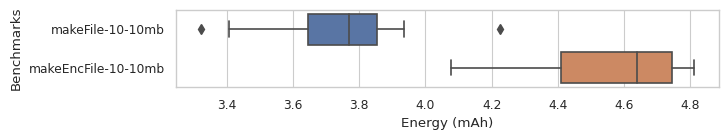

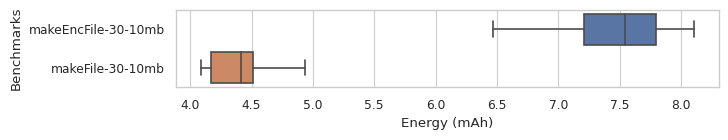

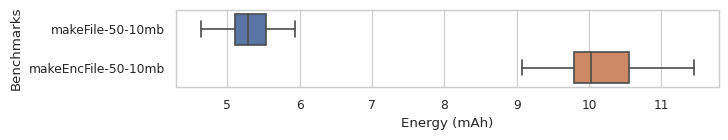

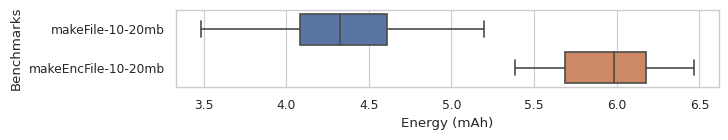

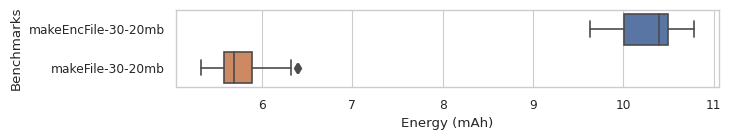

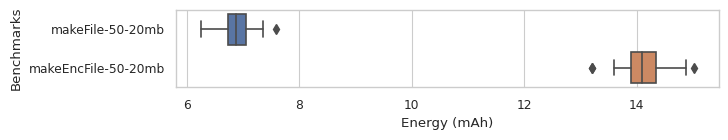

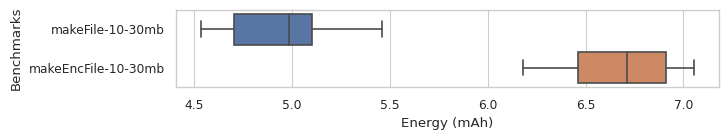

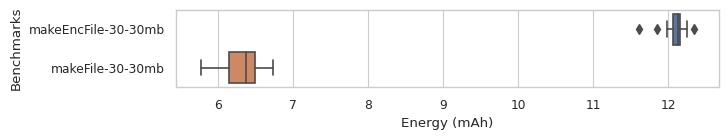

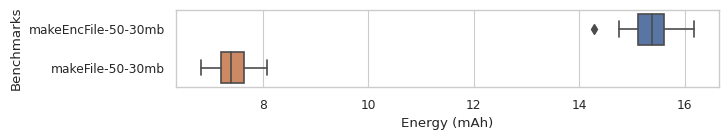

In [52]:
for key, values in comparable.items():
    data = df[df['benchmark'].isin([key, *values])]

    plt.figure(figsize=(7,1))
    ax = sns.boxplot(data=data, x=DATA_COLUMN, y='benchmark')
    
    ax.set_ylabel("Benchmarks")
    ax.set_xlabel("Energy (mAh)")
    
    plt.show()
    # plt.savefig(f"charts/{key}-energy.png", bbox_inches='tight', transparent=True)

/tmp/ipykernel_1383007/1077592505.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base.loc[:,'benchmark'] = 'Base'
/tmp/ipykernel_1383007/1077592505.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:,'benchmark'] = 'Encrypted'
/tmp/ipykernel_1383007/1077592505.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

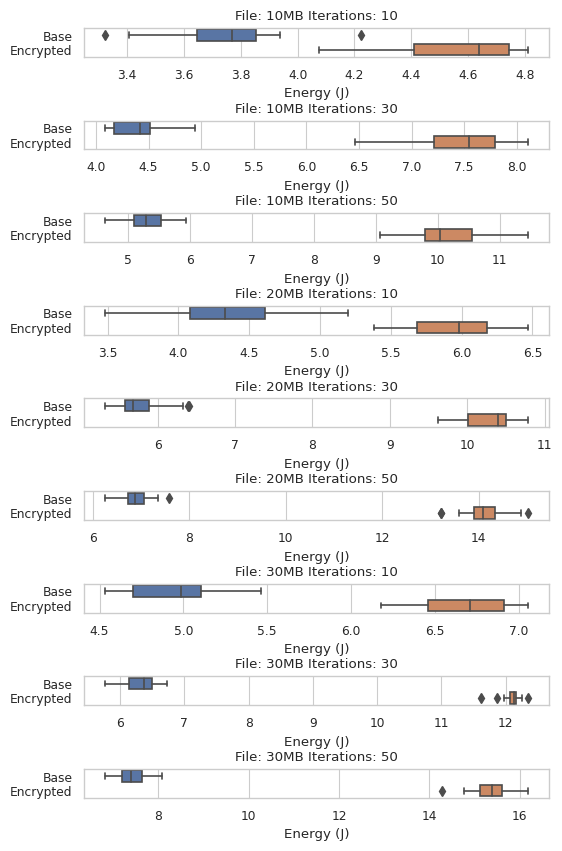

In [65]:
# to_plot = ['localLoginSharedPref-1000', 'localLoginSharedPref-10000', 'localLoginSharedPref-50000']
# title = [1000, 10000, 50000]

# to_plot = ['localLogin-100', 'localLogin-1000', 'localLogin-5000', 'localLogin-10000']
# title = [100, 1000, 5000, 10000]

to_plot = ['makeFile-10-10mb', 'makeFile-30-10mb', 'makeFile-50-10mb', 
           'makeFile-10-20mb', 'makeFile-30-20mb', 'makeFile-50-20mb',
           'makeFile-10-30mb', 'makeFile-30-30mb', 'makeFile-50-30mb']
title = [(10, 10), (30,10), (50,10), (10,20), (30,20), (50,20), (10,30), (30,30), (50,30)]


# to_plot = [
#     # 'makeFile-10-10mb', 'makeFile-30-10mb', 'makeFile-50-10mb', 
#     # 'makeFile-10-20mb', 'makeFile-30-20mb', 'makeFile-50-20mb',
#     'makeFile-10-30mb', 'makeFile-30-30mb', 'makeFile-50-30mb'
#            ]
# title = [
#     # (10, 10), (30,10), (50,10)
#     # (10,20), (30,20), (50,20)
#     (10,30), (30,30), (50,30)
#     ]


fig, axs = plt.subplots(nrows=len(to_plot), ncols=1, figsize=(6,10))
fig.subplots_adjust(hspace=2.2)

for i, key in enumerate(to_plot):
    
    base = df[df['benchmark'] == key]
    data = df[df['benchmark'] == comparable[key][0]]
    
    base.loc[:,'benchmark'] = 'Base'
    data.loc[:,'benchmark'] = 'Encrypted'
    
    sns.boxplot(ax=axs[i], data=pd.concat([base, data]), x=DATA_COLUMN, y='benchmark')
    
    axs[i].set(title=f'File: {title[i][1]}MB Iterations: {title[i][0]}', ylabel='', xlabel='Energy (J)')
    # axs[i].set(title=f'Iterations: {title[i]}', ylabel='', xlabel='Energy (J)')

# plt.show()
plt.savefig('charts/makefile.pdf', bbox_inches='tight', transparent=True)


In [58]:
for base in to_plot:
    enc = comparable[base][0]
    
    base_row = stats_df[stats_df['benchmark'] == base]
    enc_row = stats_df[stats_df['benchmark'] == enc]
    
    print(f"{base}:\t{base_row['mean'].item():.2f}\t {enc_row['mean'].item():.2f}\t {enc_row['significant'].item()}\t {enc_row['diff'].item():.2f}")

makeFile-10-30mb:	4.96	 6.66	 True	 34.48
makeFile-30-30mb:	6.35	 12.08	 True	 90.38
makeFile-50-30mb:	7.42	 15.33	 True	 106.50
